In [5]:
%pylab inline
import numpy as np
import jellyfish
import matplotlib.pyplot as plt
import pygadgetreader

Populating the interactive namespace from numpy and matplotlib


In [18]:
pos = jellyfish.Hello_sim('../../MW_anisotropy/code/test_snaps/', 'MWLMC3_100M_new_b0_090', 100000000, 0, 'host_dm', 'com_host', 'pos')

In [3]:
halo = jellyfish.Hello_sim('./', 'test_snap', 1000000, 0, 'host_dm', 'com_host', 'pos')

In [7]:
pos = halo.read_MW_snap_com_coordinates()

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions


In [11]:
I = jellyfish.shapes.shape_tensor(pos[:,0], pos[:,1], pos[:,2])

In [12]:
ar = jellyfish.shapes.axis_ratios(I)

In [13]:
ar

(array([[-0.9776348 ,  0.21025156, -0.00494853],
        [ 0.12124271,  0.54422018, -0.83013529],
        [ 0.17184415,  0.81216912,  0.55754005]]),
 (0.9786825362359802+0j),
 (0.9909601214952657+0j))

In [26]:
def shape_tensor(pos):
    """
    Compute the shape tensor as defined in Chua+18
    https://ui.adsabs.harvard.edu/abs/2019MNRAS.484..476C/abstract
    S_{ij} = 1/sum_{k}m_k  \sum_{k}1/w_k m_k r_{k,i} r_{k,j}
    For equal mass particles:


    S_{ij} = \sum_{k} k r_{k,i} r_{k,j}

    """
    assert(shape(pos)[1]==3), "Wrong dimensions for pos"
    shape_T = np.zeros([3, 3])
    npart = len(pos)
    for i in range(3):
        for j in range(3):
            s = np.zeros(npart)
            for n in range(npart):
                s[n] = pos[n,i] * pos[n,j]
            shape_T[i][j] = sum(s) 
    return shape_T


In [27]:
shape(pos)[1]

3

In [28]:
ST = shape_tensor(pos)

In [22]:
ar2 = jellyfish.shapes.axis_ratios(ST)

In [23]:
ar2

(array([[-0.9776348 ,  0.21025156, -0.00494853],
        [ 0.12124271,  0.54422018, -0.83013529],
        [ 0.17184415,  0.81216912,  0.55754005]]),
 (0.9786825362360081+0j),
 (0.9909601214952649+0j))

In [32]:
ar2[0]

array([[-0.9776348 ,  0.21025156, -0.00494853],
       [ 0.12124271,  0.54422018, -0.83013529],
       [ 0.17184415,  0.81216912,  0.55754005]])

In [33]:
dot(ar2[0], pos.T)

array([[ 80.44805058,  80.81029633,  78.9883946 , ..., -34.94698726,
        -34.12749084, -35.29059596],
       [172.26677257, 166.65840136, 157.30554496, ..., 150.3922791 ,
        151.38990476, 153.56520251],
       [-23.34014585, -21.2623608 , -22.56385664, ..., 136.79316393,
        132.59074624, 134.30804115]])

array([[ -61.77359 ,   91.709236, -156.4159  ],
       [ -62.450653,   90.42072 , -150.60353 ],
       [ -62.02712 ,   83.89062 , -143.55602 ],
       ...,
       [  75.90646 ,  185.59804 ,  -48.405334],
       [  74.50409 ,  182.90019 ,  -51.58057 ],
       [  76.20003 ,  185.23422 ,  -52.423145]], dtype=float32)

In [35]:
pos_pr = pygadgetreader.readsnap('./Prolate06_010', 'pos', 'dm')

Returning DM    Positions


In [36]:
len(pos_pr)

500000

(-200, 200)

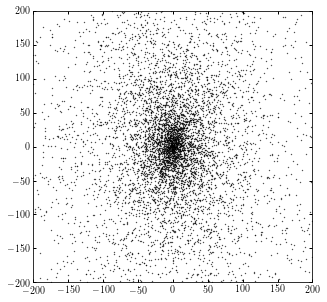

In [53]:
figsize(5,5)
scatter(pos_pr[:10000,0], pos_pr[:10000,2], s=0.1, c='k')
xlim(-200, 200)
ylim(-200, 200)

In [41]:
pos_tr_pr = pos_pr[np.where(np.sqrt(pos_pr[:,0]**2 + pos_pr[:,1]**2 + pos_pr[:,2]**2)<300)]

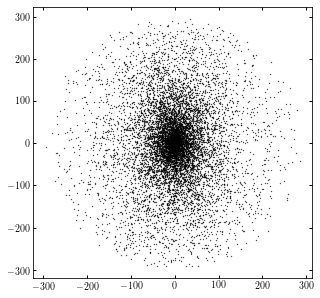

In [42]:
scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,2], s=0.1, c='k')


In [44]:
I_pr = shape_tensor(pos_tr_pr)

In [46]:
shape_pr = jellyfish.shapes.axis_ratios(I_pr)

In [47]:
shape_pr

(array([[ 0.88695856, -0.46183166,  0.00400351],
        [-0.46184756, -0.88694418,  0.00518192],
        [-0.00115771,  0.00644516,  0.99997856]]),
 (0.731350437781492+0j),
 (0.7345269182726774+0j))

In [49]:
shape_pr[1]/shape_pr[2]

(0.995675474360211+0j)

In [51]:
shape_pr[2]*shape_pr[1]

(0.5371965832410128+0j)

In [ ]:
def plot_ellipsoids(egien_v):

(-2.2, 2.2)

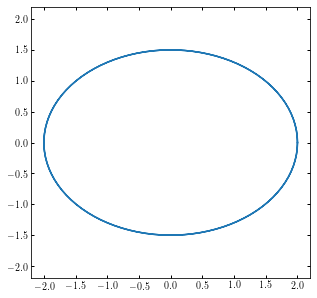

In [118]:
x0=0  #x-position of the center
y0=0  #y-position of the center
z0=0
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis
c=1
u = np.linspace(0, 2*pi, 100)
v = np.linspace(0, pi, 100)
U, V = meshgrid(u, v)

x = x0+(a*np.cos(U.flatten())*np.sin(V.flatten()))
y = y0+(b*np.sin(U.flatten())*np.sin(V.flatten()))
z = z0+(c*np.cos(V.flatten()))
index_z = np.where(np.abs(z)<0.02)[0]
plt.plot(x[index_z], y[index_z])
xlim(-2.2, 2.2)
ylim(-2.2, 2.2)

In [96]:
pos_ell = np.array([x,y,z])

In [97]:
shape(pos_ell)

(3, 10000)

In [103]:
pos_rot = dot(shape_pr[0].T, pos_ell)

(-2.2, 2.2)

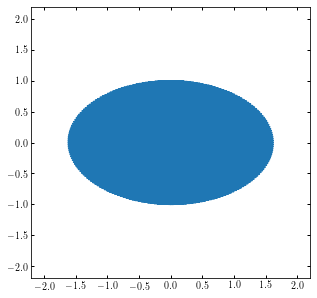

In [106]:
plt.plot(pos_rot[1], pos_rot[2])
xlim(-2.2, 2.2)
ylim(-2.2, 2.2)